In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 7 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 7 days


In [2]:
import os
import sys

In [3]:
import theano
import theano.tensor as TT
import theano.printing as TP

In [4]:
#shortcut for graph printing
from IPython.display import SVG
def svgdotprint(g):
    return SVG(theano.printing.pydotprint(g, return_image=True, format='svg'))

In [5]:
#Scalar operations
#
# Here we create "Theano Variables" - nodes in a computation graph
#
x = TT.scalar('X')
y = TT.scalar('y')
z = x * y

In [6]:
#
# We haven't computed anything yet. z is just a node in the graph
#
svgdotprint(z)

RuntimeError: Failed to import pydot. You must install pydot for `pydotprint` to work.

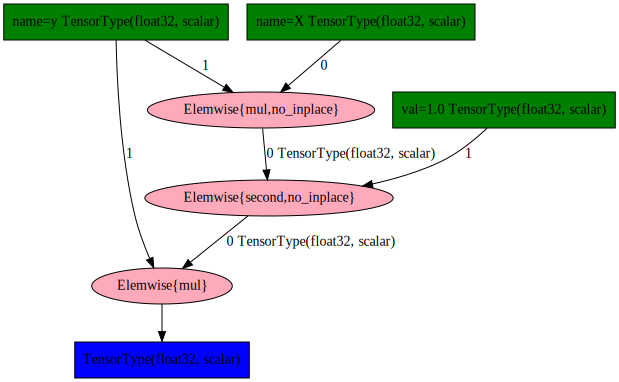

In [12]:
#
# theano.tensor.grad knows how to compute derivatives!
#
# NB: the graph below contains many computations that we don't need. The will get removed during optimization
svgdotprint(TT.grad(z,[x]))

In [27]:
#
# theano.function takes a list of free variables in a computation graph, a list of outputs 
# and compiles a function which computes the values in the graph
#
fun = theano.function([x,y], [z] + TT.grad(z,[x]))

print fun(1,2)
print fun(2,2)

[2.0, 2.0]
[4.0, 2.0]


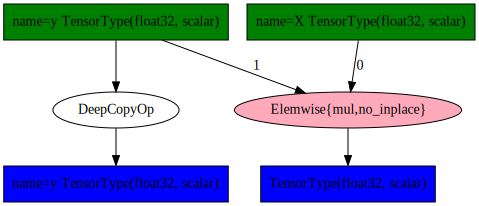

In [25]:
#
# This shows the optimized computation graph that got compiled
#
svgdotprint(fun.maker.fgraph.outputs)

In [34]:
#
# Everything works for matrices, too
#

Theta = TT.matrix('Theta')
X = TT.matrix('X')
Y = TT.matrix('Y')

#
# Question: what is this model?
#

Yhat = TT.dot(Theta.T, X)
Errs = Yhat - Y
Loss = (Errs**2).mean()
Loss.name = 'Loss'

In [37]:
#
# No more manual gradient computations
#
dLossdTheta = theano.grad(Loss, Theta)
print dLossdTheta

(dLoss/dTheta)


Shared variables in Theano are allocated storage nodes

In [40]:
SV = theano.shared(np.zeros((2,2)))
SV

<TensorType(float64, matrix)>

In [41]:
SV.get_value()

Shape: (2L, 2L)
[[ 0.  0.]
 [ 0.  0.]]

In [42]:
SV.set_value(SV.get_value()+1)
SV.get_value()

Shape: (2L, 2L)
[[ 1.  1.]
 [ 1.  1.]]

Shared variables are best used to store parameters of models. They can be updated during each call of a theano function by using the updates keyword

In [39]:
#
# A complete example, from https://github.com/Newmu/Theano-Tutorials/blob/master/1_linear_regression.py
#

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

X = TT.scalar()
Y = TT.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

cost = TT.mean(TT.sqr(y - Y))
gradient = TT.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * 0.01]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

for i in range(100):
    for x, y in zip(trX, trY):
        train(x, y)
        
print w.get_value() #something around 2

2.05034422874


Please feel free to use Theano for projects and for homewors 5 and later!

More informations:

1. Tutorials by alec Radford https://github.com/Newmu/Theano-Tutorials
1. Deep learning tutorials http://deeplearning.net/tutorial/
2. Theano tutorials http://deeplearning.net/software/theano/tutorial/
3. My notebook from the Matlab, R, and Python class: http://nbviewer.ipython.org/urls/sites.google.com/a/cs.uni.wroc.pl/jch/teaching/teaching/marpy/materialyzwykladow14i15/wyklad14.ipynb

There are many neural network libraries built on top of Theano:

1. a lightweight one, nice for learning this course https://github.com/Lasagne/Lasagne
2. a more heavy-weight one, for research https://github.com/mila-udem/blocks
